In [37]:
import glob
import pandas as pd
#outputs = []
#RagOverArXiv/data/pdfs_ws_mrkp_test/eval_outputs
pdf_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/pdf*.csv")
txt_files = glob.glob("../data/pdfs_ws_mrkp_test/eval_outputs/txt*.csv")
all_files = pdf_files+txt_files
result = pd.DataFrame()#index=list(all_files.index))
for file_path in all_files:
    print(file_path)
    output = pd.read_csv(file_path)
    print(output.shape)
    output["settings"] = file_path.split('/')[-1].replace('.csv','')
    result = pd.concat([result,output])
print(result.shape)
pd.set_option('display.max_colwidth',500)
#result[['eval_score','settings']].head(25)

../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
(77, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_NoRerank.csv
(80, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_4000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(56, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_1000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(47, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_800_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(56, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/pdf_1500_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(51, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMixtral-8x_QagenMixtral-8x_NoRerank.csv
(66, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank.csv
(84, 15)
../data/pdfs_ws_mrkp_test/eval_outputs/txt_1000_200_mxbai-emb

In [48]:
result.columns
result[['eval_score','settings']].head(2)

,eval_score,settings
0,100.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank
1,100.0,pdf_2000_200_mxbai-embe_CriticMiStralInf_QagenMiStralInf_Rerank


In [39]:
print(result['eval_score'].unique())

[ 5.  2.  4.  1.  3. nan]


In [40]:
result.shape

(732, 16)

In [41]:
result = result.dropna(subset=['eval_score'])

In [42]:
any(result.eval_score.isna())

False

In [43]:
import numpy as np
result["eval_score"] = result["eval_score"].apply(
    lambda x: x if not pd.isna(x) else 1
)
result["eval_score"] = 100*(result["eval_score"] - 1) / 4

In [44]:
result.eval_score.value_counts()

eval_score
100.0    375
0.0      102
75.0      88
25.0      38
50.0      24
Name: count, dtype: int64

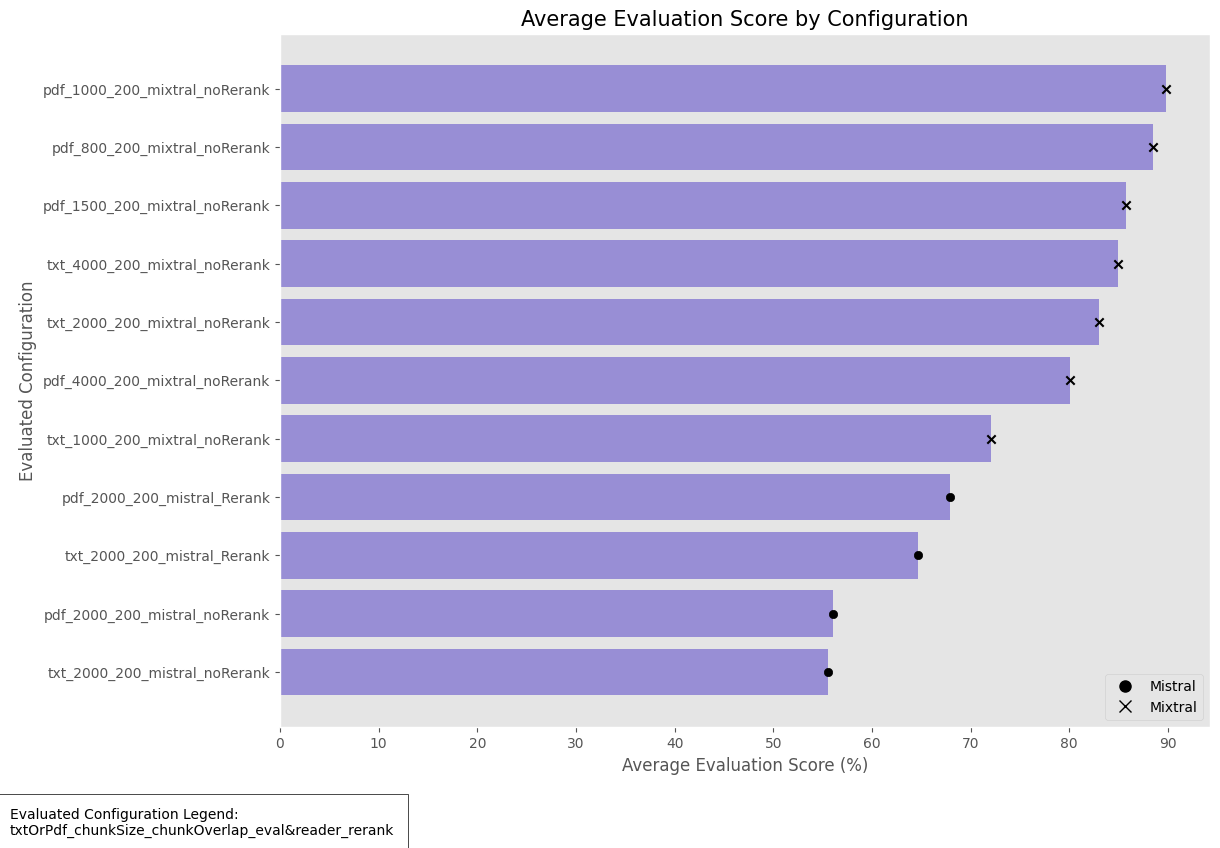

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

average_scores = result.groupby("settings")["eval_score"].mean().sort_values()
average_scores.index = average_scores.index.str.replace('CriticMiStralInf_QagenMiStralInf','mistral')
average_scores.index = average_scores.index.str.replace('CriticMixtral-8x_QagenMixtral-8x','mixtral')
average_scores.index = average_scores.index.str.replace('NoRerank','noRerank')#.str.replace('NoRerank','norerank')

average_scores.index = average_scores.index.str.replace('mxbai-embe_','')

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [color_cycle[1] if label.startswith('txt') else color_cycle[2] for label in average_scores.index]

plt.figure(figsize=(12, 9))
bars = plt.barh(average_scores.index, average_scores.values, color=colors[1])

plt.title("Average Evaluation Score by Configuration", fontsize=15)#,loc='left')
plt.ylabel("Evaluated Configuration", fontsize=12)
plt.figtext(-0.1, -0.01, "Evaluated Configuration Legend:\ntxtOrPdf_chunkSize_chunkOverlap_eval&reader_rerank", ha="left", fontsize=10,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='square,pad=1'))
plt.xlabel("Average Evaluation Score (%)", fontsize=12)#,loc='left')

plt.yticks(rotation=0)
plt.xticks(range(0,int(average_scores.max())+10,10))

# Add markers on top of the bars
for bar, label in zip(bars, average_scores.index):
    if 'mistral' in label:
        plt.scatter(bar.get_width(), bar.get_y() + bar.get_height() / 2, marker='o', color='black')
    elif 'mixtral' in label:
        plt.scatter(bar.get_width(), bar.get_y() + bar.get_height() / 2, marker='x', color='black')

import matplotlib.patches as mpatches


from matplotlib.lines import Line2D

o_marker = Line2D([], [], marker='o', color='black', label='Mistral', markersize=8,linestyle='None')
x_marker = Line2D([0], [0], marker='x', color='black', label='Mixtral', markersize=8,linestyle='None')

plt.legend(handles=[o_marker, x_marker])#,loc='upper left')
plt.savefig('../assets/eval_scores.png')
plt.grid(False)
plt.show()

In [46]:
# Add a new column 'id' that contains a unique identifier for each row
result['id'] = range(len(result))

# Create the eval_scores Series
eval_scores = pd.Series(result["eval_score"].values, index=result["id"])

In [47]:
average_scores

settings
txt_2000_200_mistral_noRerank    55.514706
pdf_2000_200_mistral_noRerank    56.060606
txt_2000_200_mistral_Rerank      64.682540
pdf_2000_200_mistral_Rerank      67.910448
txt_1000_200_mixtral_noRerank    72.083333
pdf_4000_200_mixtral_noRerank    80.102041
txt_2000_200_mixtral_noRerank    83.035714
txt_4000_200_mixtral_noRerank    84.905660
pdf_1500_200_mixtral_noRerank    85.714286
pdf_800_200_mixtral_noRerank     88.461538
pdf_1000_200_mixtral_noRerank    89.772727
Name: eval_score, dtype: float64